# Machine Learning Assignment-19


## 1. A set of one-dimensional data points is given to you: $5, 10, 15, 20, 25, 30, 35$. Assume that $k = 2$ and that the first set of random centroid is $15, 32$, and that the second set is $12, 30$.

- a) Using the `k-means` method, create two clusters for each set of centroid described above.
- b) For each set of centroid values, calculate the `SSE`.


In [39]:
import warnings

warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import numpy as np

x = np.arange(5, 36, 5).reshape(-1, 1)
k = 2
init_centroid = np.array([[15, 32], [12, 30]])
SSE = []
for centroid in init_centroid:
    print(f"Centroid: {centroid}")
    kmeans = KMeans(n_clusters=k, init=centroid.reshape(-1, 1), n_init=1)
    kmeans.fit(x)
    sse = kmeans.inertia_
    print(f"SSE: {sse}")
    SSE.append(sse)


Centroid: [15 32]
SSE: 175.0
Centroid: [12 30]
SSE: 175.0


## 2. Describe how the Market Basket Research makes use of association analysis concepts.


- In market basket analysis, association rules are used to predict the likelihood of products being purchased together.
- Association rules count the frequency of items that occur together, seeking to find associations that occur far more often than expected.
- The `Apriori` algorithm is commonly cited by data scientists in research articles about market basket analysis and is used to identify frequent items in the database, then evaluate their frequency as the datasets are expanded to larger sizes.


## 3. Give an example of the `Apriori` algorithm for learning association rules.


- `Apriori` algorithm operates on a database containing a huge number of transactions. For example, the items customers but at a Big Bazar.
- `Apriori` algorithm helps the customers to buy their products with ease and increases the sales performance of the particular store.
- If `{Grapes, Apple, Mango}` is frequent, then `{Grapes,Mango}` must also be frequent.


## 4. In hierarchical clustering, how is the distance between clusters measured? Explain how this metric is used to decide when to end the iteration.


- To calculate distance between clusters we use Single Linkage, Complete Linkage, Average Linkage or Centroid Linkage and distance is measured with Euclidean Distance.
- We used specified linkage and keep merging small cluster into big cluster and iteration is stopped when only one cluster is left.


## 5. In the `k-means` algorithm, how do you recompute the cluster centroids?


- The initial centroids were chosen arbitrarily, your model then updates them with new cluster values.
- Updated cluster centorid is the average or the mean value of all the datapoints within that cluster.
- The stopping criterion tells our algo when to stop updating the clusters.
- Some of the stopping conditions are:
  - The datapoints assigned to specific cluster remain the same (takes too much time)
  - Centroids remain the same (time consuming)
  - The distance of datapoints from their centroid is minimum (the thresh you’ve set)
  - Fixed number of iterations have reached (insufficient iterations → poor results, choose max iteration wisely)


## 6. At the start of the clustering exercise, discuss one method for determining the required number of clusters.


- **The Elbow Method**
  - Calculate the Within-Cluster-Sum of Squared (WCSS) for different values of $k$, and choose the k for which WSS becomes first starts to diminish.
  - In the plot of WCSS-versus-k, this is visible as an elbow.
- **The Silhouette Method**
  - The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).
  - The range of the Silhouette value is between +1 and -1.
  - A high value is desirable and indicates that the point is placed in the correct cluster.
  - If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.


## 7. Discuss the `k-means` algorithm's advantages and disadvantages.


- Advantages of k-means
  - Relatively simple to implement.
  - Scales to large data sets.
  - Guarantees convergence.
  - Can warm-start the positions of centroids.
  - Easily adapts to new examples.
  - Generalizes to clusters of different shapes and sizes, such as elliptical clusters.
- Disadvantages of k-means
  - Choosing $k$ manually
  - Being dependent on initial values
  - Clustering data of varying sizes and density
  - Clustering outliers
  - Scaling with number of dimensions


## 8. Draw a diagram to demonstrate the principle of clustering.


- Clustering is based on base principle of type of clustering method
  - Partitioning Clustering  
    ![Partitioning Clustering](./a19-8-1.png)
    - Density-Based Clustering  
      ![Density-Based Clustering](./a19-8-2.png)
    - Distribution Model-Based Clustering  
      ![Distribution Model-Based Clustering](./a19-8-3.png)
    - Hierarchical Clustering  
      ![Hierarchical Clustering](./a19-8-4.png)
    - Fuzzy Clustering


## 9. During your study, you discovered seven findings, which are listed in the data points below. Using the `K-means` algorithm, you want to build three clusters from these observations. The clusters $C1$, $C2$, and $C3$ have the following findings after the first iteration:

$$
\begin{aligned}
C1&: (2,2), (4,4), (6,6); \\
C2&: (0,4), (4,0); \\
C3&: (5,5), (9,9);\\
\end{aligned}
$$

- What would the cluster centroids be if you were to run a second iteration?
- What would this clustering's SSE be?


$$
\begin{aligned}
C1 &= (\frac{2+4+6}{3},\frac{2+4+6}{3}) &= (4,4) \\
C2 &= (\frac{0+4}{2},\frac{4+0}{2}) &= (2,2) \\
C3 &= (\frac{5+9}{2},\frac{5+9}{2}) &= (7,7) \\
\end{aligned}
$$


In [38]:
data_point = np.array([[[2, 2], [4, 4], [6, 6]], [[0, 4], [4, 0]], [[5, 5], [9, 9]]])
cluster_centroid = np.array([[4, 4], [2, 2], [7, 7]])
for i, points in enumerate(data_point):
    print(f"Cluster {i} SSE: {((points-cluster_centroid[i])**2).sum()}")


Cluster 0 SSE: 16
Cluster 1 SSE: 16
Cluster 2 SSE: 16


## 10. In a software project, the team is attempting to determine if software flaws discovered during testing are identical. Based on the text analytics of the defect details, they decided to build 5 clusters of related defects. Any new defect formed after the 5 clusters of defects have been identified must be listed as one of the forms identified by clustering. A simple diagram can be used to explain this process. Assume you have 20 defect data points that are clustered into 5 clusters and you used the `k-means` algorithm.


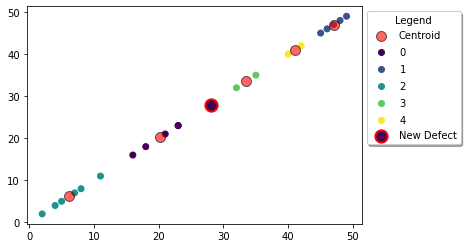

In [108]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

np.random.seed(17)
defects = np.random.randint(1, 50, (20, 1))
kmeans = KMeans(5, random_state=64)
cluster_label = kmeans.fit_predict(defects)
new_defect = [[28]]
new_defect_cluster = kmeans.predict(new_defect)
ax1 = plt.scatter(defects, defects, c=cluster_label)
handle1, label1 = ax1.legend_elements()
ax2 = plt.scatter(kmeans.cluster_centers_, kmeans.cluster_centers_, c="r", alpha=0.6, s=100, ec="k", label="Centroid")
ax_new = plt.scatter(new_defect, new_defect, c=new_defect_cluster, s=150, ec="r", lw=2, label="New defect")
plt.legend(
    handles=[ax2, *handle1, ax_new],
    labels=["Centroid", *label1, "New Defect"],
    bbox_to_anchor=[1, 1],
    title="Legend",
    shadow=True,
)
